# Garett Hansen - Data Wrangling Project

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering

In [2]:
#read in twitter archive csv

twt_arch = pd.read_csv('twitter-archive-enhanced.csv')

twt_arch.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
#download and read in image predictions tsv

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
        
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

img_pred.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [4]:
#Twitter API parameters

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
#Use tweet_id to import data and store in tweet_json.txt

with open('tweet_json.txt', 'w') as output:
    for tweet_id in twt_arch['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except:
            continue

In [6]:
#read each line from tweet_json.txt into dataframe

twitter_list = []

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        twitter_list.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})

tw_df = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])     

In [7]:
#check dataframe

tw_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8186,37520
1,892177421306343426,6056,32250
2,891815181378084864,4004,24297
3,891689557279858688,8327,40858
4,891327558926688256,9033,39061


In [8]:
#save a copy of the twitter data in a csv file

tw_df.to_csv('twitter_df.csv', index=False)

## Assessing

#### Twitter Archive

In [9]:
#visual inspection of a sample set of rows from the dataset

twt_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup was carefully tossed to make it look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892...,12,10,None,None,None,None,None
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None
885,760153949710192640,NaN,NaN,2016-08-01 16:43:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @hownottodraw: The story/person behind @dog...,7.601538e+17,195036846.0,2016-08-01 16:42:51 +0000,"https://weratedogs.com/pages/about-us,https://...",11,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1069,740365076218183684,NaN,NaN,2016-06-08 02:09:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740365076...,10,10,None,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833863086...,12,10,Bentley,None,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
1833,676146341966438401,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None


In [10]:
#check column values

twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#check for duplicates

print(sum(twt_arch.duplicated()))
twt_arch[twt_arch.duplicated()]

0


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
#summary statistics

twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Image Predictions

In [13]:
#visual inspection of a sample set of rows from the dataset

img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
820,692919143163629568,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
1022,710272297844797440,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True
148,668633411083464705,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
903,700062718104104960,https://pbs.twimg.com/media/CbcfUxoUAAAlHGK.jpg,1,hummingbird,0.180998,False,peacock,0.135179,False,eel,0.075371,False
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True


In [14]:
#check column values

img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#check for duplicates

print(sum(img_pred.duplicated()))
img_pred[img_pred.duplicated()]

0


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
#summary statistics

img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
#see how many non-dog values are contained in highest confidence level column

img_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#### Twitter API Data

In [18]:
#visual inspection of a sample set of rows from the dataset

tw_df.sample(10)

,tweet_id,retweet_count,favorite_count
345,830173239259324417,6059,0
160,859851578198683649,3518,15332
609,795464331001561088,25772,52631
1941,673363615379013632,310,1028
591,798340744599797760,3627,0
945,750719632563142656,5343,13735
495,812466873996607488,2080,8421
657,789903600034189313,4458,10973
1810,676237365392908289,303,1247
400,822872901745569793,46976,138375


In [19]:
#check column values

tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [20]:
#check for duplicates

print(sum(tw_df.duplicated()))
tw_df[tw_df.duplicated()]

0


,tweet_id,retweet_count,favorite_count


In [21]:
#summary statistics

tw_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2876.115533,7839.706461
std,6.824243e+16,4858.623890,12150.271348
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,580.000000,1361.000000
50%,7.185406e+17,1344.000000,3420.000000
75%,7.986825e+17,3355.000000,9604.000000
max,8.924206e+17,82420.000000,162052.000000


### Issues With Data

#### Quality

* Remove reply tweets from `Twitter Archive`
* Remove retweets from `Twitter Archive`
* After reply tweet and retweets have been removed, remove these columns from `Twitter Archive`
* Change tweet_id to string format in `all three dataframes`
* Change timestamp colums in `Twitter Archive`
* Change rating columns to float in `Twitter Archive`
* Remove non-dog rows from `Image Predictions` based on p1 column
* Change non-dog names to None in `Twitter Archive`
* Remove _ and change values from p1 column in `Image Predictions` to proper case
* Change prediction column names (p1, p1_conf, p2, etc) in `Image Predictions` to more descriptive labels

#### Tidiness

* Combine dog types into one column instead of four columns in `Twitter Archive`
* Remove original dog type columns after combining into one column in `Twitter Archive`
* Combine the three separate dataframes into one dataframe

## Cleaning

In [22]:
#make copies of original dataframes

twt_arch_clean = twt_arch.copy()
img_pred_clean = img_pred.copy()
tw_df_clean = tw_df.copy()

### Quality

#### Define
Remove reply tweets from `Twitter Archive`

#### Code

In [23]:
twt_arch_clean.drop(twt_arch_clean.loc[twt_arch_clean['in_reply_to_status_id'].notnull()].index, inplace=True)

#### Test

In [24]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

#### Define
Remove retweets from `Twitter Archive`

#### Code

In [25]:
twt_arch_clean.drop(twt_arch_clean.loc[twt_arch_clean['retweeted_status_id'].notnull()].index, inplace=True)

#### Test

In [26]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define
After retweets have been removed, remove associated retweet columns from `Twitter Archive`

#### Code

In [27]:
twt_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


#### Test

In [28]:
list(twt_arch_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
Change tweet_id to string in all three dataframes

#### Code

In [29]:
twt_arch_clean.tweet_id = twt_arch_clean.tweet_id.astype('str')
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype('str')
tw_df_clean.tweet_id = tw_df_clean.tweet_id.astype('str')

#### Test

In [30]:
print(type(twt_arch_clean.tweet_id[0]), 
      type(img_pred_clean.tweet_id[0]), 
      type(tw_df_clean.tweet_id[0]))

<class 'str'> <class 'str'> <class 'str'>


#### Define
Change timestamp colum in `Twitter Archive`

#### Code

In [31]:
twt_arch_clean.timestamp = pd.to_datetime(twt_arch_clean.timestamp)

#### Test

In [32]:
twt_arch_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Define
Change rating columns to float in `Twitter Archive`

#### Code

In [33]:
convert_ratings = {'rating_numerator': float,
                  'rating_denominator': float}

twt_arch_clean = twt_arch_clean.astype(convert_ratings)

#### Test

In [34]:
twt_arch_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Define
Remove non-dog rows from `Image Predictions` based on p1 values

#### Code

In [35]:
img_pred_clean.drop(img_pred_clean[img_pred_clean.p1_dog == False].index, inplace=True)

#### Test

In [36]:
len(img_pred_clean.query('p1_dog == False'))

0

#### Define
Change non-dog names to Unknown in `Twitter Archive`

#### Code

In [37]:
wrong_names = ['a', 'all', 'an', 'by', 'his', 'incredibly', 'infuriating', 'life', 'light', 'mad', 'my', 'not', 'old', 'one',
               'quite', 'such', 'the', 'this', 'unacceptable', 'very']


for name in twt_arch_clean.name:
    if name in wrong_names:
        twt_arch_clean.name[twt_arch_clean.name == name] = 'None'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Test

In [38]:
for name in twt_arch_clean.name:
    if name in wrong_names:
        print(name)

In [39]:
twt_arch_clean.name.value_counts()

None         698
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Lola           8
Daisy          7
Toby           7
Bo             6
Bella          6
Jax            6
Bailey         6
Koda           6
Oscar          6
Stanley        6
Chester        5
Leo            5
Scout          5
Bentley        5
Louis          5
Dave           5
Buddy          5
Milo           5
Rusty          5
Larry          4
Jeffrey        4
            ... 
Jimbo          1
Gordon         1
Cora           1
Jerome         1
Amber          1
Ole            1
Georgie        1
Tito           1
Josep          1
Dudley         1
Mary           1
Wiggles        1
Ralphy         1
Bobbay         1
Livvie         1
Torque         1
Blipson        1
Aubie          1
Snicku         1
DayZ           1
Barry          1
Hurley         1
Happy          1
Covach         1
Sprinkles      1
Quinn          1
Shooter        1
Huxley        

#### Define
Remove _ and change values from p1 column in `Image Predictions` to proper case

#### Code

In [40]:
img_pred_clean.p1 = img_pred_clean.p1.str.replace("_", " ")
img_pred_clean.p1 = img_pred_clean.p1.str.title()

#### Test

In [41]:
len(img_pred_clean[img_pred_clean['p1'].str.contains("_")])

0

In [42]:
img_pred_clean.p1.value_counts()

Golden Retriever               150
Labrador Retriever             100
Pembroke                        89
Chihuahua                       83
Pug                             57
Chow                            44
Samoyed                         43
Toy Poodle                      39
Pomeranian                      38
Cocker Spaniel                  30
Malamute                        30
French Bulldog                  26
Miniature Pinscher              23
Chesapeake Bay Retriever        23
German Shepherd                 20
Siberian Husky                  20
Staffordshire Bullterrier       20
Cardigan                        19
Eskimo Dog                      18
Beagle                          18
Maltese Dog                     18
Shetland Sheepdog               18
Shih-Tzu                        17
Rottweiler                      17
Lakeland Terrier                17
Italian Greyhound               16
Kuvasz                          16
West Highland White Terrier     14
Great Pyrenees      

#### Define
Change prediction column names (p1, p1_conf, p2, etc) in `Image Predictions` to more descriptive labels

#### Code

In [43]:
img_pred_clean.rename(columns = {'p1': 'prediction_1', 'p1_conf': 'confidence_interval_1', 'p1_dog': 'p1=dog?', 
                                 'p2': 'prediction_2', 'p2_conf': 'confidence_interval_2', 'p2_dog': 'p2=dog?', 
                                 'p3': 'prediction_3', 'p3_conf': 'confidence_interval_3', 'p3_dog': 'p3=dog?'}, inplace=True)



#### Test

In [44]:
list(img_pred_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_interval_1',
 'p1=dog?',
 'prediction_2',
 'confidence_interval_2',
 'p2=dog?',
 'prediction_3',
 'confidence_interval_3',
 'p3=dog?']

### Tidiness

#### Define
Combine dog types into one column instead of four columns in `Twitter Archive`

#### Code

In [45]:
twt_arch_clean['dog_type'] = twt_arch_clean.doggo + twt_arch_clean.floofer + twt_arch_clean.pupper + twt_arch_clean.puppo
twt_arch_clean.loc[twt_arch_clean.dog_type == 'NoneNoneNoneNone', 'dog_type'] = 'Not Available'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'NoneNonepupperNone', 'dog_type'] = 'Pupper'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'doggoNoneNoneNone', 'dog_type'] = 'Doggo'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'NoneNoneNonepuppo', 'dog_type'] = 'Puppo'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'doggoNonepupperNone', 'dog_type'] = 'Doggo, Pupper'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'NoneflooferNoneNone', 'dog_type'] = 'Floofer'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'doggoNoneNonepuppo', 'dog_type'] = 'Doggo, Puppo'
twt_arch_clean.loc[twt_arch_clean.dog_type == 'doggoflooferNoneNone', 'dog_type'] = 'Doggo, Floofer'


#### Test

In [46]:
twt_arch_clean.dog_type.value_counts()

Not Available     1761
Pupper             221
Doggo               72
Puppo               23
Doggo, Pupper        9
Floofer              9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_type, dtype: int64

#### Define
Remove original dog type columns after combining into one column in `Twitter Archive`

#### Code

In [47]:
twt_arch_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

#### Test

In [48]:
list(twt_arch_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type']

#### Define
Combine the three separate dataframes into one dataframe

#### Code

In [49]:
#merge first two dataframes

df_merge_1 = pd.merge(twt_arch_clean,
                        img_pred_clean,
                     how = 'left', on = ['tweet_id'])

In [50]:
#convert tweet_id to int

tw_df_clean.tweet_id = tw_df_clean.tweet_id.astype(int)
df_merge_1.tweet_id = df_merge_1.tweet_id.astype(int)

In [51]:
#merge remaining dataframes as master

df_master = pd.merge(df_merge_1,
                    tw_df,
                    how = 'left', on = ['tweet_id'])

#### Test

In [52]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
tweet_id                 2097 non-null int64
timestamp                2097 non-null datetime64[ns, UTC]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null float64
rating_denominator       2097 non-null float64
name                     2097 non-null object
dog_type                 2097 non-null object
jpg_url                  1463 non-null object
img_num                  1463 non-null float64
prediction_1             1463 non-null object
confidence_interval_1    1463 non-null float64
p1=dog?                  1463 non-null object
prediction_2             1463 non-null object
confidence_interval_2    1463 non-null float64
p2=dog?                  1463 non-null object
prediction_3             1463 non-null object
confidence_interval_3    1463 non-null float64
p

In [53]:
df_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,...,confidence_interval_1,p1=dog?,prediction_2,confidence_interval_2,p2=dog?,prediction_3,confidence_interval_3,p3=dog?,retweet_count,favorite_count
712,756998049151549440,2016-07-23 23:42:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,https://twitter.com/dog_rates/status/756998049...,11.0,10.0,Oliver,Not Available,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,...,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True,2107.0,6550.0
1057,709179584944730112,2016-03-14 00:49:23+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sammy. He's in a tree. Very excited ab...,https://vine.co/v/iwAjdlEjwMl,13.0,10.0,Sammy,Not Available,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696.0,2067.0
267,832273440279240704,2017-02-16 17:00:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14.0,10.0,Smiley,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/83227...,...,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True,2470.0,11759.0
1083,707610948723478529,2016-03-09 16:56:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,https://twitter.com/dog_rates/status/707610948...,12.0,10.0,Harper,Not Available,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,...,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True,6693.0,17510.0
970,718460005985447936,2016-04-08 15:26:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,https://twitter.com/dog_rates/status/718460005...,9.0,10.0,Bowie,Not Available,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,2776.0


In [54]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualization

#### Insight 1
Is there a correlation between favorites and retweets?
>Based on the scatterplot below, there does appear to be a strong correlation between the number of favorites and retweets. The more favorites a tweet receives, the more likely that tweet is to be retweeted.

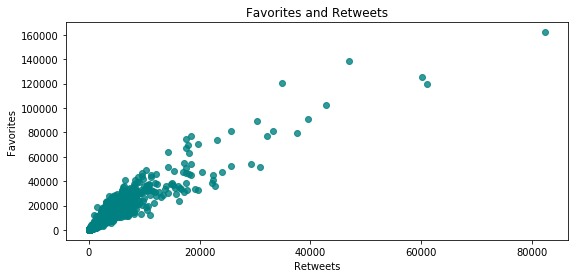

In [55]:
plt.figure(figsize=(9,4))
plt.scatter(df_master.retweet_count, df_master.favorite_count, color='teal', alpha=.8)
plt.title('Favorites and Retweets')
plt.xlabel('Retweets')
plt.ylabel('Favorites')

fig = plt.gcf()
fig.savefig('output1.png',bbox_inches='tight');

#### Insight 2
Based on image predictions, what is the most popular dog breed?
>Golden Retriever

In [56]:
df_master.prediction_1.value_counts()

Golden Retriever               137
Labrador Retriever              94
Pembroke                        88
Chihuahua                       78
Pug                             54
Chow                            41
Samoyed                         40
Pomeranian                      38
Toy Poodle                      37
Malamute                        29
Cocker Spaniel                  27
French Bulldog                  26
Chesapeake Bay Retriever        23
Miniature Pinscher              21
German Shepherd                 20
Siberian Husky                  20
Staffordshire Bullterrier       19
Maltese Dog                     18
Shetland Sheepdog               18
Eskimo Dog                      18
Beagle                          17
Cardigan                        17
Shih-Tzu                        17
Italian Greyhound               16
Rottweiler                      16
Lakeland Terrier                15
Kuvasz                          15
Great Pyrenees                  14
West Highland White 

#### Insight 3
What is the most popular dog type?
>Pupper

In [57]:
df_master.dog_type.value_counts()

Not Available     1761
Pupper             221
Doggo               72
Puppo               23
Doggo, Pupper        9
Floofer              9
Doggo, Puppo         1
Doggo, Floofer       1
Name: dog_type, dtype: int64